In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
78,6.0,2.9,4.5,1.5,1.0
70,5.9,3.2,4.8,1.8,1.0
136,6.3,3.4,5.6,2.4,2.0
31,5.4,3.4,1.5,0.4,0.0
28,5.2,3.4,1.4,0.2,0.0


In [2]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 42,
                                                    test_size = 0.2)

In [3]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the classifier
dtc = DecisionTreeClassifier()
#fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [4]:
y_pred = dtc.predict(X_test)

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(dtc, 
                out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

install from https://graphviz.org/download/

- For Windows, Remember to add to system path as part of the installation. See below screenshot
- For Mac, follow the steps here https://graphviz.org/download/#mac
- Restart kernel in Jupyter Notebook
- Some of you might need to restart your laptop
<div>
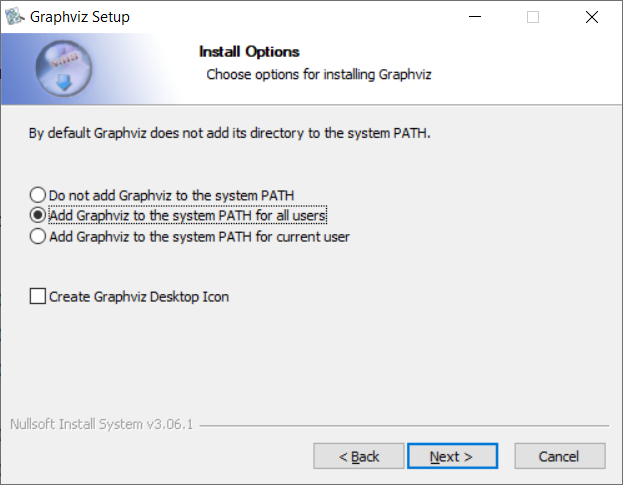
</div>


In [7]:
# using system commands
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
from IPython.display import Image
Image(filename = 'tree.png')